<a href="https://colab.research.google.com/github/lophiraalata/data-analytics-micro-credential/blob/assignments/FinalProject_LibraryUsage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project: Brooklyn Public Library Usage

With a provided or self chosen dataset, conduct a detailed and comprehensive analysis.

The Notebook must contain:
Data source and problem statement detailing the aim of the analysis.
3-5 Visualizations to illustrate your thoughts throughout the analysis.
3-5 data splits per ML algorithm indicating increase or decrease of the accuracy of the model.
A comprehensive paragraph (3-5 sentences) explaining you conclusion.
Cheers!

Submit the link to the repository containing the completed analysis.  There will be no late submissions - Late work will be marked as 0!

In [ ]:
# References Used: 

1. https://www.kaggle.com/datasets/datasf/sf-library-usage-data

2. https://studentwork.prattsi.org/infovis/visualization/final-project-tracking-culturepass-reservation-trends/

3. https://labs.loc.gov/static/labs/work/reports/Cordell-LOC-ML-report.pdf

4. https://dl.acm.org/doi/abs/10.1145/3162957.3162961


# 1.0. Problem statement

For this assignment, I will conduct a comprehensive analysis on data that shows how patrons interact with the Brooklyn Public Library, as well as attempt to predict patron behavior and identify trends in patron library usage. An additional goal of this project is to explore applications for machine learning in public libraries. I have adapted the data I received to protect patron privacy. 

The Brooklyn Public Library is the public library system of the New York City borough of Brooklyn. It is the sixteenth largest public library system in the United States by holding and the seventh by number of visitors. Most of Brooklyn’s 2.7 million residents live within a half-mile of a BPL branch. Our collection holds more than 2.86 million physical items and 250,000 digital materials.

For the past two years, I have worked for the Brooklyn Public Library at the New Lots Branch. This dataset was provided to to me by Drew Stanley, who works in the Strategy Office at Brooklyn Public Library. The dataset I received included reservation information such as reservation ID, reservation date, attraction, borough, and the name of the library system used to book the reservation. 

# 2.0. Environment set up

Load the required libraries

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
sns.set()

import plotly.express as px
from copy import copy
import tensorflow as tf
from tensorflow import keras
import plotly.offline as py
import plotly.express as px
import plotly.graph_objects as go

# 3.0. Data source

This data is sourced from BklynSTAT, a Tableau server managed by staff at the Brooklyn Public Library (BPL). Nearly all of the data used in this project is open access, available on the Brooklyn Pubic Library's Tableau Public site. Through this platform, users can see interactive data visualizations. I was able to download this data for use in this project as data is all available to everyone who works at the library. 

https://public.tableau.com/app/profile/bpl.it

In [75]:
!wget https://raw.githubusercontent.com/lophiraalata/ML-Data/final-project/CircBranchCompare.csv

--2022-08-23 03:10:41--  https://raw.githubusercontent.com/lophiraalata/ML-Data/final-project/CircBranchCompare.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1686 (1.6K) [text/plain]
Saving to: ‘CircBranchCompare.csv’

CircBranchCompare.c 100%[===================>]   1.65K  --.-KB/s    in 0s      

2022-08-23 03:10:41 (41.7 MB/s) - ‘CircBranchCompare.csv’ saved [1686/1686]



In [76]:
circ = pd.read_csv('CircBranchCompare.csv')

In [6]:
!wget https://raw.githubusercontent.com/lophiraalata/ML-Data/final-project/Attendance%20by%20Branch.csv

--2022-08-23 00:46:41--  https://raw.githubusercontent.com/lophiraalata/ML-Data/final-project/Attendance%20by%20Branch.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1426 (1.4K) [text/plain]
Saving to: ‘Attendance by Branch.csv’

Attendance by Branc 100%[===================>]   1.39K  --.-KB/s    in 0s      

2022-08-23 00:46:41 (11.9 MB/s) - ‘Attendance by Branch.csv’ saved [1426/1426]



In [7]:
attendance = pd.read_csv('Attendance by Branch.csv')

In [1]:
!wget https://raw.githubusercontent.com/lophiraalata/ML-Data/final-project/Branch%20Card%20Creation_data.csv

--2022-08-23 00:45:00--  https://raw.githubusercontent.com/lophiraalata/ML-Data/final-project/Branch%20Card%20Creation_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1393 (1.4K) [text/plain]
Saving to: ‘Branch Card Creation_data.csv’

Branch Card Creatio 100%[===================>]   1.36K  --.-KB/s    in 0s      

2022-08-23 00:45:00 (19.5 MB/s) - ‘Branch Card Creation_data.csv’ saved [1393/1393]



In [4]:
card = pd.read_csv('Branch Card Creation_data.csv')

# 4.0. Exploratory data analysis

In [4]:
attendance.head()

# The vast majority of events attended were conducted virtually
# The Central Library is the largest and main branch of the Brooklyn Public Library
# The Central branch is also where the majority of BPL's events and programs are hosted

,Branch,\tAttendance,\tRank of Attendance along Branch (for branch compare)
0,Virtual,203979,1
1,Central Library,35240,2
2,Flatbush,6548,3
3,New Lots,6322,4
4,Greenpoint,5681,5


In [7]:
attendance.tail()

# It is particularly interesting that the Flatbush branch is ranked 3rd overall in terms of program attendance
# while the neighboring East Flatbush branch ranks last by the same metric. 
# Despite geographic closeness, we can observe a signficant difference in the program attendance at these two branches
# There are a couple reasons this might be, one being that the Flatbush branch is significantly larger than the East Flatbush branch in terms of physical space and collections
# Additionally, the Flatbush branch is home to one of BPL'S five Adult Learning Centers, a major patron draw
# Also the East Flatbush branch is not as active in terms of programming and does not host nearly as many events as the Flatbush branch each year

,Branch,\tAttendance,\tRank of Attendance along Branch (for branch compare)
59,Gravesend,504,60
60,Fort Hamilton,358,61
61,Saratoga,333,62
62,Ryder,246,63
63,East Flatbush,190,64


In [5]:
attendance.info()

# The 64 entries correspond to 58 neighborhood branches plus virtual and specialty programs/collections

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 3 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   Branch                                                 64 non-null     object
 1   	Attendance                                            64 non-null     int64 
 2   	Rank of Attendance along Branch (for branch compare)  64 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.6+ KB


In [6]:
attendance.describe()

# We will need to adjust the column names

,\tAttendance,\tRank of Attendance along Branch (for branch compare)
count,64.000000,64.000000
mean,6054.593750,32.500000
std,25513.830669,18.618987
min,190.000000,1.000000
25%,1136.250000,16.750000
50%,2255.500000,32.500000
75%,3217.750000,48.250000
max,203979.000000,64.000000


In [37]:
attendance.isnull()

,Branch,Number of Patrons in Attendance,Rank
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
59,False,False,False
60,False,False,False
61,False,False,False
62,False,False,False


In [10]:
attendance.dtypes.value_counts()

# One of the datatypes is an object rather than integer, this will need to be adjusted

int64     2
object    1
dtype: int64

In [77]:
circ.head()

,Circ Branch,\tRank of Transaction Type along Circ Branch,\tNum_Transactions
0,Central Library,1,6541681
1,Kings Highway,2,3349236
2,Midwood,3,2500819
3,McKinley Park,4,2231039
4,Services for Older Adults,5,1496422


In [78]:
circ.tail()

,Circ Branch,\tRank of Transaction Type along Circ Branch,\tNum_Transactions
63,Center For Brooklyn History,64,29275
64,Kidsmobile,65,13623
65,Annex,66,8603
66,Brookdale Pop-Up,67,1102
67,Bookmobile 2,68,59


In [79]:
circ.info

<bound method DataFrame.info of                     Circ Branch  \tRank of Transaction Type along Circ Branch  \
0               Central Library                                             1   
1                 Kings Highway                                             2   
2                       Midwood                                             3   
3                 McKinley Park                                             4   
4     Services for Older Adults                                             5   
..                          ...                                           ...   
63  Center For Brooklyn History                                            64   
64                   Kidsmobile                                            65   
65                        Annex                                            66   
66             Brookdale Pop-Up                                            67   
67                 Bookmobile 2                                            68

In [80]:
circ.columns

Index(['Circ Branch', '\tRank of Transaction Type along Circ Branch',
       '\tNum_Transactions'],
      dtype='object')

In [81]:
circ.dtypes

Circ Branch                                     object
\tRank of Transaction Type along Circ Branch     int64
\tNum_Transactions                               int64
dtype: object

In [82]:
circ.shape

(68, 3)

In [89]:
circ.describe

<bound method NDFrame.describe of                     Circ Branch  \tRank of Transaction Type along Circ Branch  \
0               Central Library                                             1   
1                 Kings Highway                                             2   
2                       Midwood                                             3   
3                 McKinley Park                                             4   
4     Services for Older Adults                                             5   
..                          ...                                           ...   
63  Center For Brooklyn History                                            64   
64                   Kidsmobile                                            65   
65                        Annex                                            66   
66             Brookdale Pop-Up                                            67   
67                 Bookmobile 2                                            

In [90]:
circ.dtypes

Circ Branch                                     object
\tRank of Transaction Type along Circ Branch     int64
\tNum_Transactions                               int64
dtype: object

In [91]:
circ.isnull()

,Circ Branch,\tRank of Transaction Type along Circ Branch,\tNum_Transactions
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
63,False,False,False
64,False,False,False
65,False,False,False
66,False,False,False


In [25]:
card.head()

,Branch,\tRank of # new cards,\t# new cards
0,Center For Brooklyn History,65,6
1,Annex,64,56
2,Brower Park,63,97
3,Gerritsen Beach,62,299
4,East Flatbush,61,313


In [70]:
card.tail()

,Branch,\tRank of # new cards,\t# new cards
60,DeKalb,5,2742
61,Park Slope,4,2753
62,Greenpoint,3,5426
63,Central Library,2,11759
64,No Branch,1,59783


In [71]:
card.shape

(65, 3)

In [85]:
card.columns

# Column names will be changed for conciseness and clarity

Index(['Branch', '\tRank of # new cards', '\t# new cards'], dtype='object')

In [87]:
card.dtypes

Branch                   object
\tRank of # new cards     int64
\t# new cards             int64
dtype: object

In [88]:
card.describe

<bound method NDFrame.describe of                          Branch  \tRank of # new cards  \t# new cards
0   Center For Brooklyn History                     65              6
1                         Annex                     64             56
2                   Brower Park                     63             97
3               Gerritsen Beach                     62            299
4                 East Flatbush                     61            313
..                          ...                    ...            ...
60                       DeKalb                      5           2742
61                   Park Slope                      4           2753
62                   Greenpoint                      3           5426
63              Central Library                      2          11759
64                    No Branch                      1          59783

[65 rows x 3 columns]>

In [92]:
card.isnull()

# No null values in dataset

,Branch,\tRank of # new cards,\t# new cards
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
60,False,False,False
61,False,False,False
62,False,False,False
63,False,False,False


# 5.0. Features

## 5.1. Circulation

In [84]:
circ.rename(columns={'\tRank of Transaction Type along Circ Branch': 'Rank', '\tNum_Transactions': 'Num_transactions'})

,Circ Branch,Rank,Num_transactions
0,Central Library,1,6541681
1,Kings Highway,2,3349236
2,Midwood,3,2500819
3,McKinley Park,4,2231039
4,Services for Older Adults,5,1496422
...,...,...,...
63,Center For Brooklyn History,64,29275
64,Kidsmobile,65,13623
65,Annex,66,8603
66,Brookdale Pop-Up,67,1102


## 5.2. Program attendance

In [38]:
attendance.rename(columns={'\tAttendance': 'Number_Attending', '\tRank of Attendance along Branch (for branch compare)': 'Rank'}, inplace=True)

# Renaming columns for conciseness

In [41]:
attendance.head()

,Branch,Number_attending,Rank
0,Virtual,203979,1
1,Central Library,35240,2
2,Flatbush,6548,3
3,New Lots,6322,4
4,Greenpoint,5681,5


## 5.3. Library card creation

In [86]:
card.rename(columns={'\tRank of # new cards': 'Rank', '\t# new cards': 'Num_NewCards'})

# Renaming columns to make data easier to deal with

,Branch,Rank,Num_NewCards
0,Center For Brooklyn History,65,6
1,Annex,64,56
2,Brower Park,63,97
3,Gerritsen Beach,62,299
4,East Flatbush,61,313
...,...,...,...
60,DeKalb,5,2742
61,Park Slope,4,2753
62,Greenpoint,3,5426
63,Central Library,2,11759


# 6.0. Data visualization

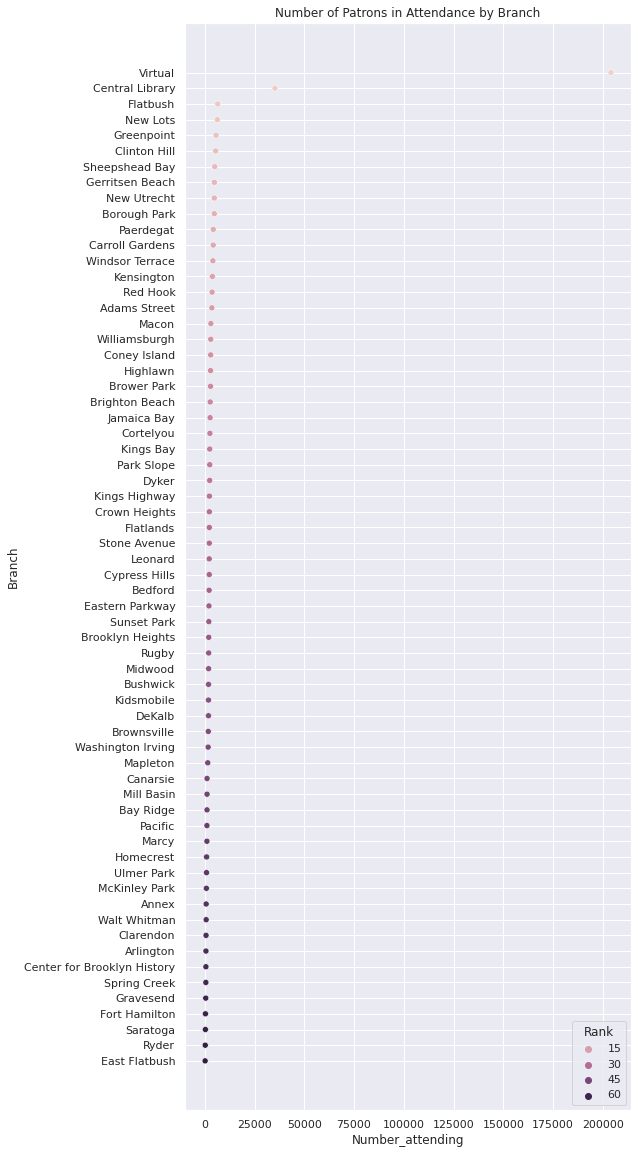

In [53]:
plt.figure(figsize=(8,20))
ax = sns.scatterplot(x='Number_attending', y = 'Branch', data=attendance, hue = 'Rank')
ax.set_title('Number of Patrons in Attendance by Branch');

# This graph is particularly useful for showing how drastic the difference is between 
# Virtual attendance and attendance at any in-person programming

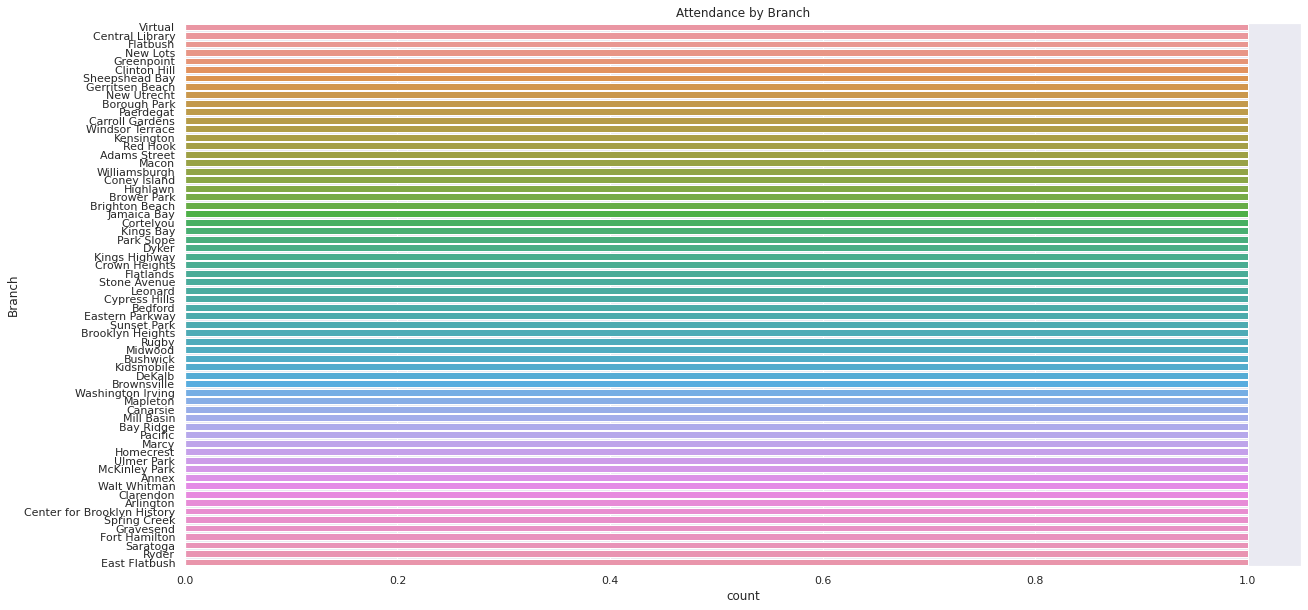

Attendance by Branch
Virtual             1.5625
Central Library     1.5625
Eastern Parkway     1.5625
Sunset Park         1.5625
Brooklyn Heights    1.5625
                     ...  
Dyker               1.5625
Kings Highway       1.5625
Crown Heights       1.5625
Flatlands           1.5625
East Flatbush       1.5625
Name: Branch, Length: 64, dtype: float64


In [62]:
plt.figure(figsize=(20,10))
sns.countplot(y=attendance.Branch, data = attendance)
plt.title('Attendance by Branch')
plt.show()

print('Attendance by Branch')
print(attendance.Branch.value_counts(normalize = True)*100)

# Need to reconfigure data vis to allow X to represent Number_attending rather than the number of data points per branch

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Patron Attendance at Library Programs')

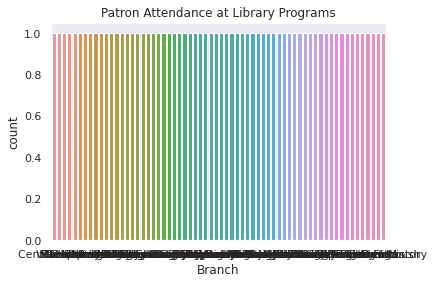

In [63]:
sns.countplot(attendance['Branch']).set_title('Patron Attendance at Library Programs')

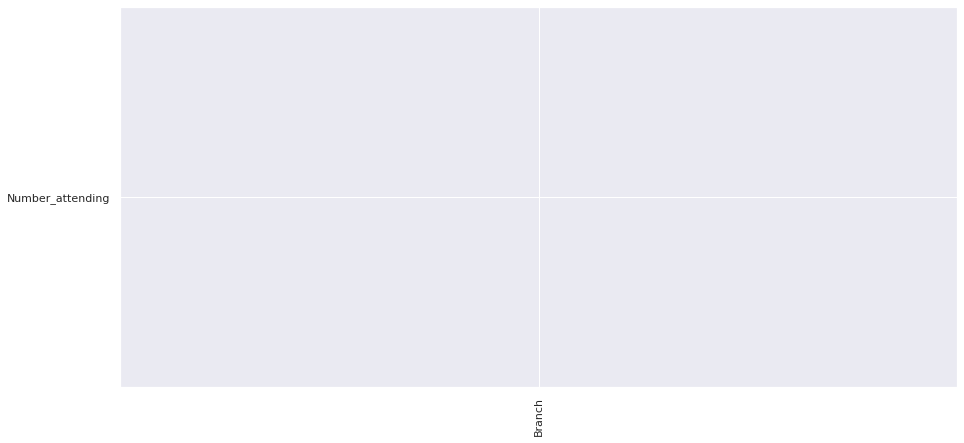

In [57]:
plt.figure(figsize=(15,7))
plt.bar(x='Branch', height='Number_attending', color='red')
plt.xticks(rotation=90)
plt.show()

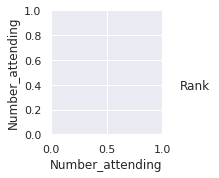

In [64]:
sns.pairplot(attendance,hue='Rank',palette='coolwarm')

ValueError: ignored

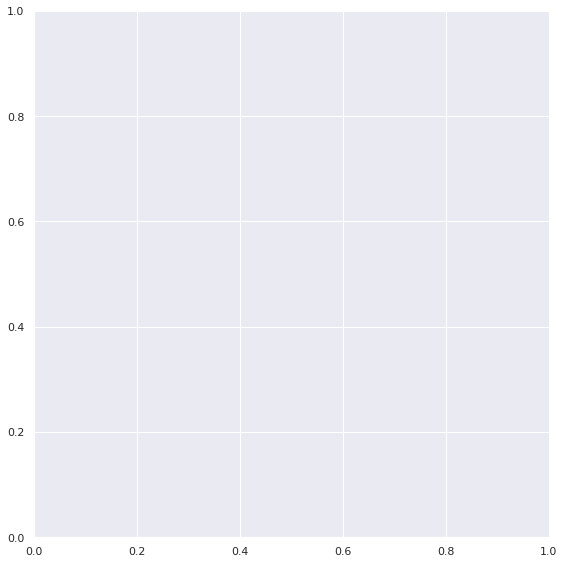

In [55]:
sns.lmplot(data=attendance, x="Branch", y="Number_attending", height = 8)

# The number of patrons who attended virtual events exists as a string rather than a float

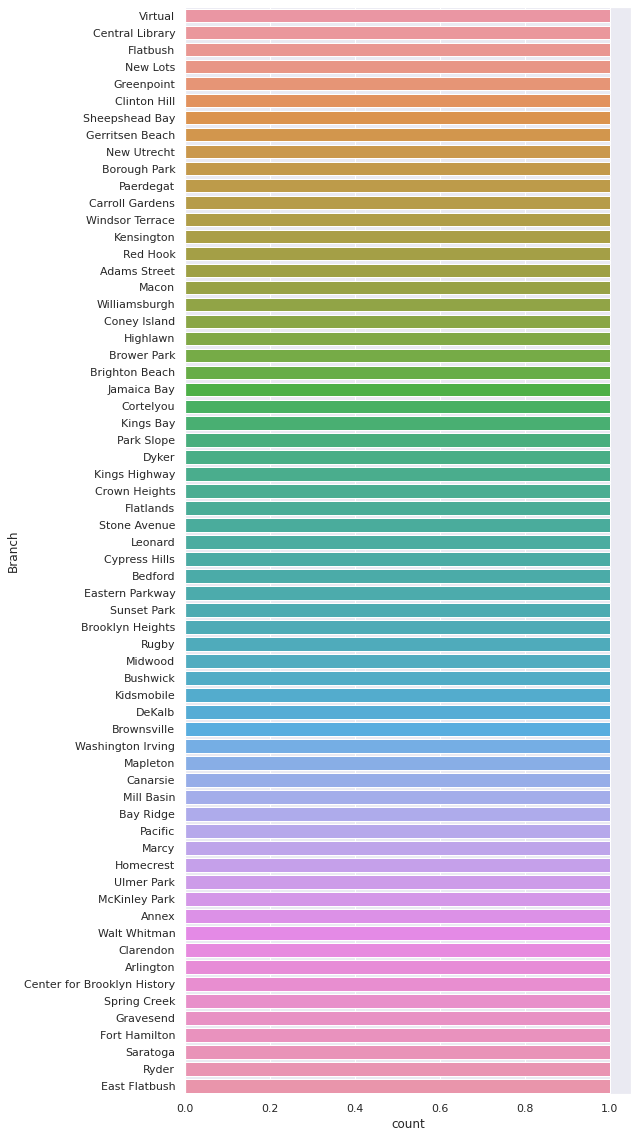

In [52]:
plt.figure(figsize=(8,20))
sns.countplot(y=attendance.Branch, data = attendance)

# Countplot do not allow user to provide both X and Y arguments

In [ ]:
sns.lmplot(data=circ, x="Num_attending", y="Branch", height = 20)

# 7.0. Modeling and train-test split

In [ ]:
from sklearn.model_selection import train_test_split

## 7.1. Logistic Regression

In [ ]:
# Logistic Regression 

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
logit = LogisticRegression(fit_intercept=True, penalty='l1')
logit.fit(X_train, y_train)

## 7.2. Linear Regression 

In [ ]:
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## 7.3. Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=28, criterion = "entropy", min_samples_split=10)
dtree.fit(X_train, y_train)

In [ ]:
dtree_pred = dtree.predict(X_test)
pd.crosstab(pd.Series(y_test, name = 'Actual'), pd.Series(dtree_pred, name = 'Predict'), margins = True)

## 7.4. Random Forest

In [ ]:
X = df_pd[feature_set_no_int]
y = df_pd['readmitted']

print('Original dataset shape {}'.format(Counter(y)))
smt = SMOTE(random_state=20)
train_input_new, train_output_new = smt.fit_sample(X, y)

print('New dataset shape {}'.format(Counter(train_output_new)))
train_input_new = pd.DataFrame(train_input_new, columns = list(X.columns))
X_train, X_test, y_train, y_test = train_test_split(train_input_new, train_

# 9.0. Make predictions

Based on the data included here, we can make predictions about what patron usage might look like in the coming months.

Utilizing available information on branches, circulation, programs and events, as well as the analytics generated in this project, I would predict that circulation and program attendance will grow in the main branch as well as the five Adult Learning Centers. These branches tend to be the most well-resourced and are able to provide the most robust programming and collections.

I also predict that we will see a correlation between programming and library card sign-ups. At branches where there is a lot of events and community programs, we will likely see a higher number of library card creations. 

In [ ]:
# Limited ability to make predictions due to difficulties with wrangling data

# 10.0 Conclusions

This analysis can be used to direct decision-making in regard to library programming and circulaton. It is crucial that the Brooklyn Public Library continue to provide virtual programming for the foreseeable future as these offerings have allowed for significantly and consistently increased attendance at library programs and events. Additionally, looking at the reliance on digital circulation, it will be important for BPL to increase availability of digital items and to promote and publicize existing digitization efforts. Certain branches are bound to have greater circulation due to their capacities for storage, geographic location/neighborhood, and unique environment, among other factors. 

Although my analysis is not complete, this is part of an ongoing project as part of my work for the Brooklyn Public Library. In my analysis, I have paid special attention to data from the New Lots Branch of BPL in hopes of identifying insights to share with my team. I hope to deepen my analysis to see how patron demographic data may both complicate and clarify the potential meanings of the data. 

This data is all available to everyone who works at the library so that as we are making decisions, whether they be system‑wide decisions or decisions on a branch level, this data is input to those decisions. It also lends a sense of transparency across the organization, so that everyone can see the factors that were part of making that decision.

